<a href="https://colab.research.google.com/github/MochNad/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Pengolahan Citra dan Visi Komputer - Modul 3**
*   Nama : Moch. Nadi Rafli Maulana
*   NIM : 2141720188
*   No. Absen : 18
*   Kelas : TI-3B
*   Jurusan / Prodi : Teknologi Informasi / D4 - Teknik Informatika

> **▶ Praktikum**

In [1]:
# Mengimpor modul 'drive' dari library Google Colab
from google.colab import drive

# Mount (mengaitkan) Google Drive ke dalam sesi Colab Anda
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library OpenCV dengan alias 'cv'
import cv2 as cv

# Import fungsi 'cv2_imshow' dari 'google.colab.patches' untuk menampilkan gambar di Colab
from google.colab.patches import cv2_imshow

# Import modul 'io' dari 'skimage' untuk mengambil gambar dari URL atau file
from skimage import io

# Import modul 'pyplot' dari 'matplotlib' dengan alias 'plt' untuk menampilkan gambar
import matplotlib.pyplot as plt

# Import modul 'numpy' dengan alias 'np'
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


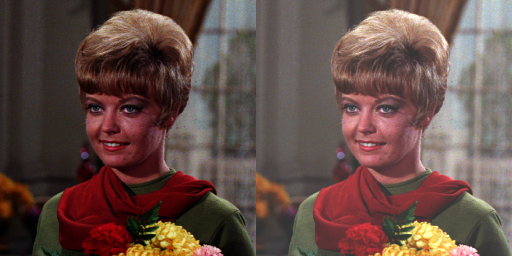

In [3]:
# Meminta pengguna memasukkan nilai kecerahan yang diinginkan
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

# Membaca citra asli dari Google Drive
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Membuat citra baru dengan ukuran dan tipe data yang sama dengan citra asli
brightness_image = np.zeros(original.shape, original.dtype)

# Loop melalui setiap pixel pada citra asli dan mengubah tingkat kecerahan sesuai input pengguna
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# Menggabungkan citra asli dengan citra yang telah diubah tingkat kecerahannya
final_frame = cv.hconcat((original, brightness_image))

# Menampilkan citra asli dan citra dengan tingkat kecerahan yang telah diubah menggunakan 'cv2_imshow'
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


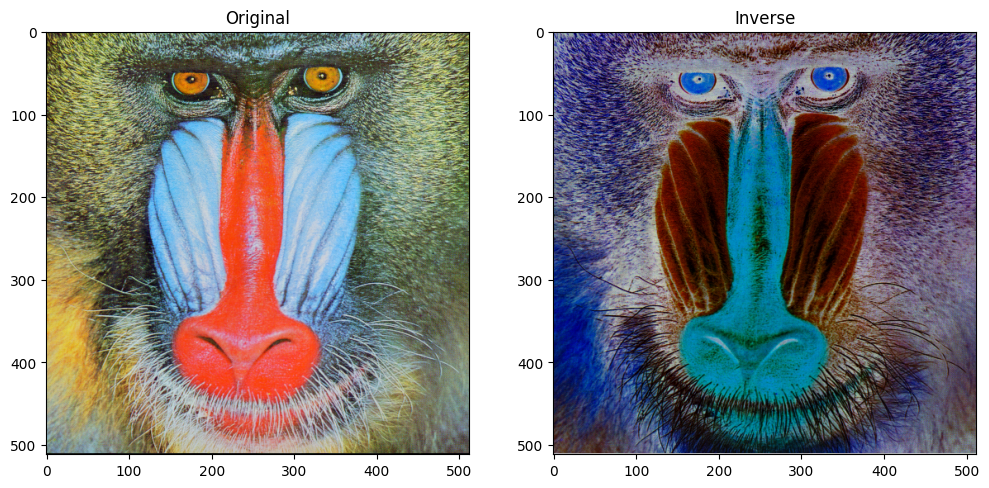

In [57]:
# Meminta pengguna memasukkan nilai kecerahan yang diinginkan
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

# Membaca citra asli dari Google Drive
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Membuat citra baru dengan ukuran dan tipe data yang sama dengan citra asli
brightness_image = np.zeros(original.shape, original.dtype)

# Loop melalui setiap pixel pada citra asli dan mengubah tingkat kecerahan sesuai input pengguna (invers)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(255 - (original[y, x, c] + brightness), 0, 255)

# Menampilkan citra asli dan citra dengan tingkat kecerahan yang telah diubah menggunakan Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv.cvtColor(brightness_image, cv.COLOR_BGR2RGB))
plt.title('Inverse')

plt.show()

Mengubah tingkat kecerahan dan kontras citra
--------------------------------------------
Masukkan tingkat kecerahan: 50
Masukkan kontras: 2


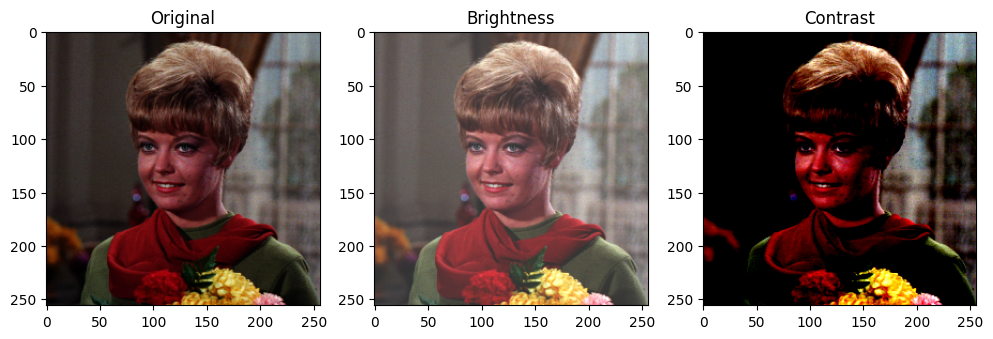

In [51]:
# Meminta pengguna memasukkan nilai kecerahan dan kontras yang diinginkan
print('Mengubah tingkat kecerahan dan kontras citra')
print('--------------------------------------------')
try:
    brightness = int(input('Masukkan tingkat kecerahan: '))
    contrast_factor = float(input('Masukkan kontras: '))
except ValueError:
    print('Error, not a valid number')

# Membaca citra asli dari Google Drive
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Membuat citra baru dengan ukuran dan tipe data yang sama dengan citra asli
brightness_image = np.zeros(original.shape, original.dtype)
contrast_image = np.zeros(original.shape, original.dtype)

# Loop melalui setiap pixel pada citra asli dan mengubah tingkat kecerahan dan kontras sesuai input pengguna
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            new_brightness_value = np.clip(original[y, x, c] + brightness, 0, 255)
            brightness_image[y, x, c] = new_brightness_value

            new_contrast_value = np.clip(contrast_factor * (original[y, x, c] - 128) + 128, 0, 255)
            contrast_image[y, x, c] = new_contrast_value

# Menampilkan citra asli, citra dengan tingkat kecerahan yang telah diubah, dan citra dengan tingkat kontras yang telah diubah menggunakan Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(132)
plt.imshow(cv.cvtColor(brightness_image, cv.COLOR_BGR2RGB))
plt.title('Brightness')

plt.subplot(133)
plt.imshow(cv.cvtColor(contrast_image, cv.COLOR_BGR2RGB))
plt.title('Contrast')

plt.show()

Mengubah tingkat kecerahan citra dengan transformasi logaritmik
-------------------------------------------------------------
Masukkan nilai kecerahan: 50


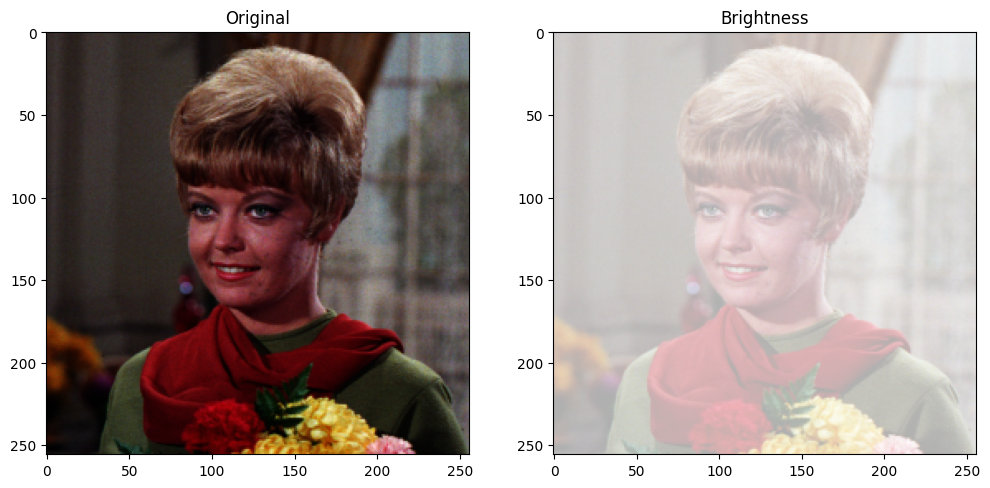

In [52]:
# Membaca citra asli dari Google Drive
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Menampilkan pesan dan meminta pengguna memasukkan nilai kecerahan
print('Mengubah tingkat kecerahan citra dengan transformasi logaritmik')
print('-------------------------------------------------------------')
try:
    brightness = float(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a valid number')

# Menerapkan transformasi logaritmik pada citra asli
brightness_log_image = np.log1p(original.astype(float) + brightness)
brightness_log_image = (brightness_log_image / brightness_log_image.max()) * 255
brightness_log_image = np.uint8(brightness_log_image)

# Menampilkan citra asli dan citra dengan tingkat kecerahan yang telah diubah menggunakan Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv.cvtColor(brightness_log_image, cv.COLOR_BGR2RGB))
plt.title('Brightness')

plt.show()

<ipython-input-58-ed963b45dbac>:13: RuntimeWarning: overflow encountered in ubyte_scalars
  gray_lightness[y, x] = int((max(r, g, b) + min(r, g, b)) / 2)


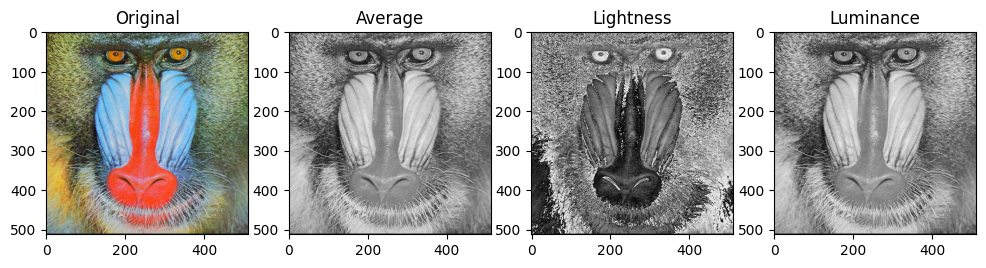

In [58]:
# Membaca citra asli dari Google Drive
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Membuat citra grayscale dengan metode Averaging
gray_averaging = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Membuat citra grayscale dengan metode Lightness
gray_lightness = np.zeros(original.shape[:2], dtype=np.uint8)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        r, g, b = original[y, x]
        gray_lightness[y, x] = int((max(r, g, b) + min(r, g, b)) / 2)

# Membuat citra grayscale dengan metode Luminance (Y)
gray_luminance = cv.cvtColor(original, cv.COLOR_BGR2YCrCb)[:, :, 0]

# Menampilkan citra asli dan citra grayscale dengan teks menggunakan Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(141)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(142)
plt.imshow(gray_averaging, cmap='gray')
plt.title('Average')

plt.subplot(143)
plt.imshow(gray_lightness, cmap='gray')
plt.title('Lightness')

plt.subplot(144)
plt.imshow(gray_luminance, cmap='gray')
plt.title('Luminance')

plt.show()

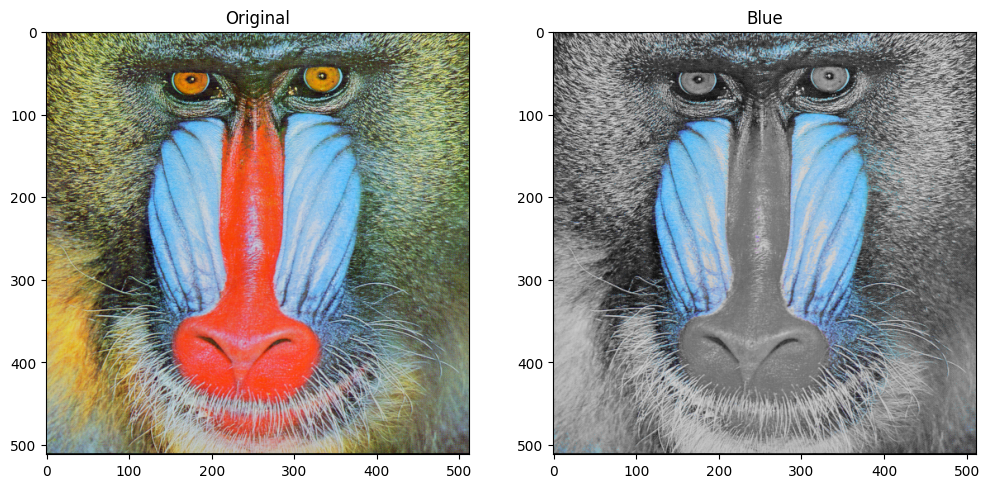

In [61]:
# Membaca citra asli dari Google Drive
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Mengubah citra ke ruang warna HSV
hsv_image = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Menentukan rentang warna biru dalam model warna HSV
lower_blue = np.array([90, 50, 50])  # Rentang warna biru bawah (H, S, V)
upper_blue = np.array([150, 255, 255])  # Rentang warna biru atas (H, S, V)

# Membuat mask untuk warna biru
mask = cv.inRange(hsv_image, lower_blue, upper_blue)

# Menggabungkan citra asli dan citra grayscale menggunakan mask
result = cv.bitwise_and(original, original, mask=mask)

# Mengubah bagian yang tidak berwarna biru menjadi grayscale
gray_mask = cv.bitwise_not(mask)
gray_part = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_part = cv.cvtColor(gray_part, cv.COLOR_GRAY2BGR)
result_gray = cv.bitwise_and(gray_part, gray_part, mask=gray_mask)

# Menggabungkan citra berwarna biru dan citra grayscale
final_result = cv.add(result, result_gray)

# Menampilkan citra asli dan hasilnya menggunakan Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv.cvtColor(final_result, cv.COLOR_BGR2RGB))
plt.title('Blue')

plt.show()